# **Experiment-5. Plotting and Visualizing Time Series Data**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# Load the Bitcoin dataset
print("Loading Bitcoin dataset...")
try:
    # Try loading the dataset
    btc_data = pd.read_csv('btcusd_1-min_data.csv')
    print(f"Dataset loaded successfully! Shape: {btc_data.shape}")

except FileNotFoundError:
    print("File not found. Please ensure 'btcusd_1-min_data.csv' is in the current directory")
    # Create sample data for demonstration
    print("Creating sample data for demonstration...")
    date_range = pd.date_range(start='2022-01-01', end='2024-01-01', freq='H')
    n_points = len(date_range)

    # Create sample data
    btc_data = pd.DataFrame({
        'Timestamp': date_range,
        'Open': 40000 + np.cumsum(np.random.normal(0, 50, n_points)),
        'High': 41000 + np.cumsum(np.random.normal(0, 50, n_points)),
        'Low': 39000 + np.cumsum(np.random.normal(0, 50, n_points)),
        'Close': 40500 + np.cumsum(np.random.normal(0, 50, n_points)),
        'Volume_(BTC)': np.random.uniform(100, 10000, n_points),
        'Volume_(Currency)': np.random.uniform(1000000, 50000000, n_points)
    })

# Display basic information about the dataset
print("\nDataset Info:")
print(btc_data.info())

print("\nFirst 5 rows:")
btc_data.head()

Loading Bitcoin dataset...
File not found. Please ensure 'btcusd_1-min_data.csv' is in the current directory
Creating sample data for demonstration...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          17521 non-null  datetime64[ns]
 1   Open               17521 non-null  float64       
 2   High               17521 non-null  float64       
 3   Low                17521 non-null  float64       
 4   Close              17521 non-null  float64       
 5   Volume_(BTC)       17521 non-null  float64       
 6   Volume_(Currency)  17521 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 958.3 KB
None

First 5 rows:


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
0,2022-01-01 00:00:00,39971.058964,40932.103287,38961.376430,40451.318609,3714.249813,4.351591e+07
1,2022-01-01 01:00:00,39943.248212,41002.207188,38952.367317,40498.648544,2063.954103,3.668939e+07
2,2022-01-01 02:00:00,39891.934842,40983.894587,38897.553185,40515.554823,6280.744942,4.950202e+07
3,2022-01-01 03:00:00,39882.655376,41068.201832,38873.255744,40548.295729,4128.194844,2.285779e+07
4,2022-01-01 04:00:00,39864.639343,41064.102294,38843.597283,40548.045797,9755.429727,4.600620e+07


In [ ]:
# Data preprocessing
print("Performing data preprocessing...")

# Check for missing values
print("\nMissing values:")
print(btc_data.isnull().sum())

# Handle missing values
btc_data_clean = btc_data.dropna()

# Convert timestamp to datetime if needed
if 'Timestamp' in btc_data_clean.columns:
    btc_data_clean['Timestamp'] = pd.to_datetime(btc_data_clean['Timestamp'])
    btc_data_clean.set_index('Timestamp', inplace=True)
elif 'timestamp' in btc_data_clean.columns:
    btc_data_clean['timestamp'] = pd.to_datetime(btc_data_clean['timestamp'])
    btc_data_clean.set_index('timestamp', inplace=True)

print(f"\nData after cleaning: {btc_data_clean.shape}")
print("\nBasic statistics:")
btc_data_clean.describe()

Performing data preprocessing...

Missing values:
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
dtype: int64

Data after cleaning: (17521, 6)

Basic statistics:


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
count,17521.000000,17521.000000,17521.000000,17521.000000,17521.000000,1.752100e+04
mean,43529.248305,35997.095131,39463.756371,38097.893606,5027.138994,2.545365e+07
std,2602.221399,1419.079348,2328.668534,2858.588676,2838.126405,1.418491e+07
min,38058.451294,32287.895029,35242.275459,32884.998406,100.362291,1.002303e+06
25%,41423.580738,35017.331901,37869.587414,35531.720967,2578.172899,1.307127e+07
50%,44187.802470,35976.383050,39078.940507,38105.582653,5019.366464,2.536069e+07
75%,45697.476112,36989.852383,40649.840254,40797.704011,7449.093815,3.780803e+07
max,48133.908557,41068.201832,45870.020950,42935.646849,9999.891813,4.999651e+07


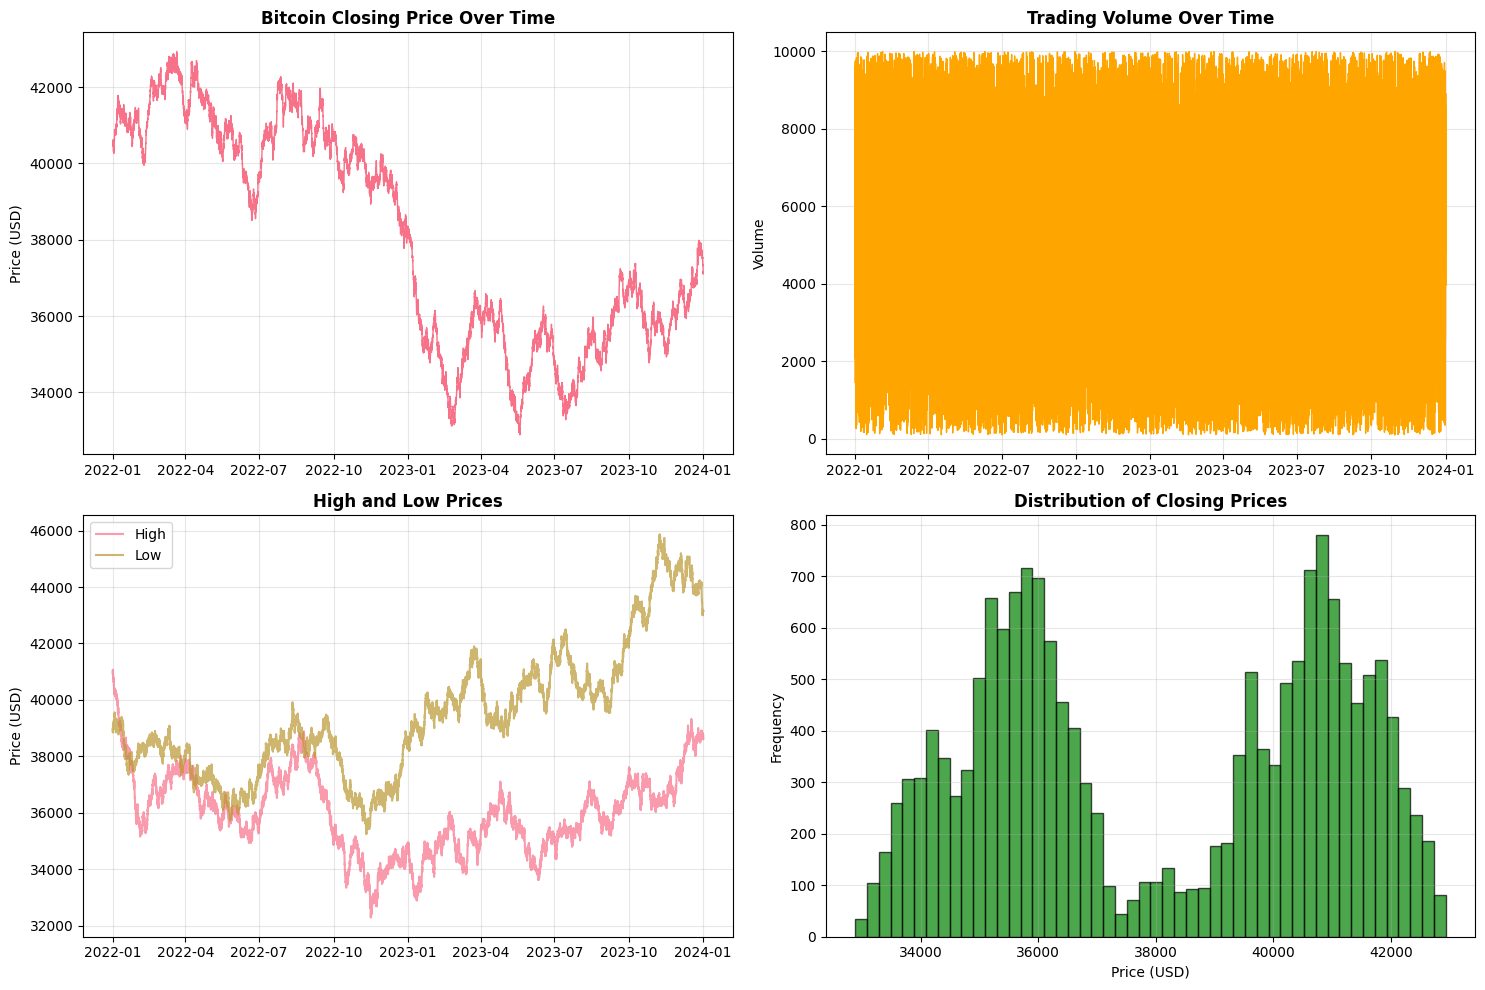

In [ ]:
# Basic time series visualization
plt.figure(figsize=(15, 10))

# Plot 1: Closing price
plt.subplot(2, 2, 1)
close_col = [col for col in btc_data_clean.columns if 'Close' in col or 'close' in col][0]
plt.plot(btc_data_clean.index, btc_data_clean[close_col], linewidth=1)
plt.title('Bitcoin Closing Price Over Time', fontweight='bold')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

# Plot 2: Volume
plt.subplot(2, 2, 2)
volume_col = [col for col in btc_data_clean.columns if 'Volume' in col or 'volume' in col][0]
plt.plot(btc_data_clean.index, btc_data_clean[volume_col], color='orange', linewidth=1)
plt.title('Trading Volume Over Time', fontweight='bold')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)

# Plot 3: High and Low prices
plt.subplot(2, 2, 3)
high_col = [col for col in btc_data_clean.columns if 'High' in col or 'high' in col][0]
low_col = [col for col in btc_data_clean.columns if 'Low' in col or 'low' in col][0]
plt.plot(btc_data_clean.index, btc_data_clean[high_col], label='High', alpha=0.7)
plt.plot(btc_data_clean.index, btc_data_clean[low_col], label='Low', alpha=0.7)
plt.title('High and Low Prices', fontweight='bold')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Price distribution
plt.subplot(2, 2, 4)
plt.hist(btc_data_clean[close_col], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Closing Prices', fontweight='bold')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

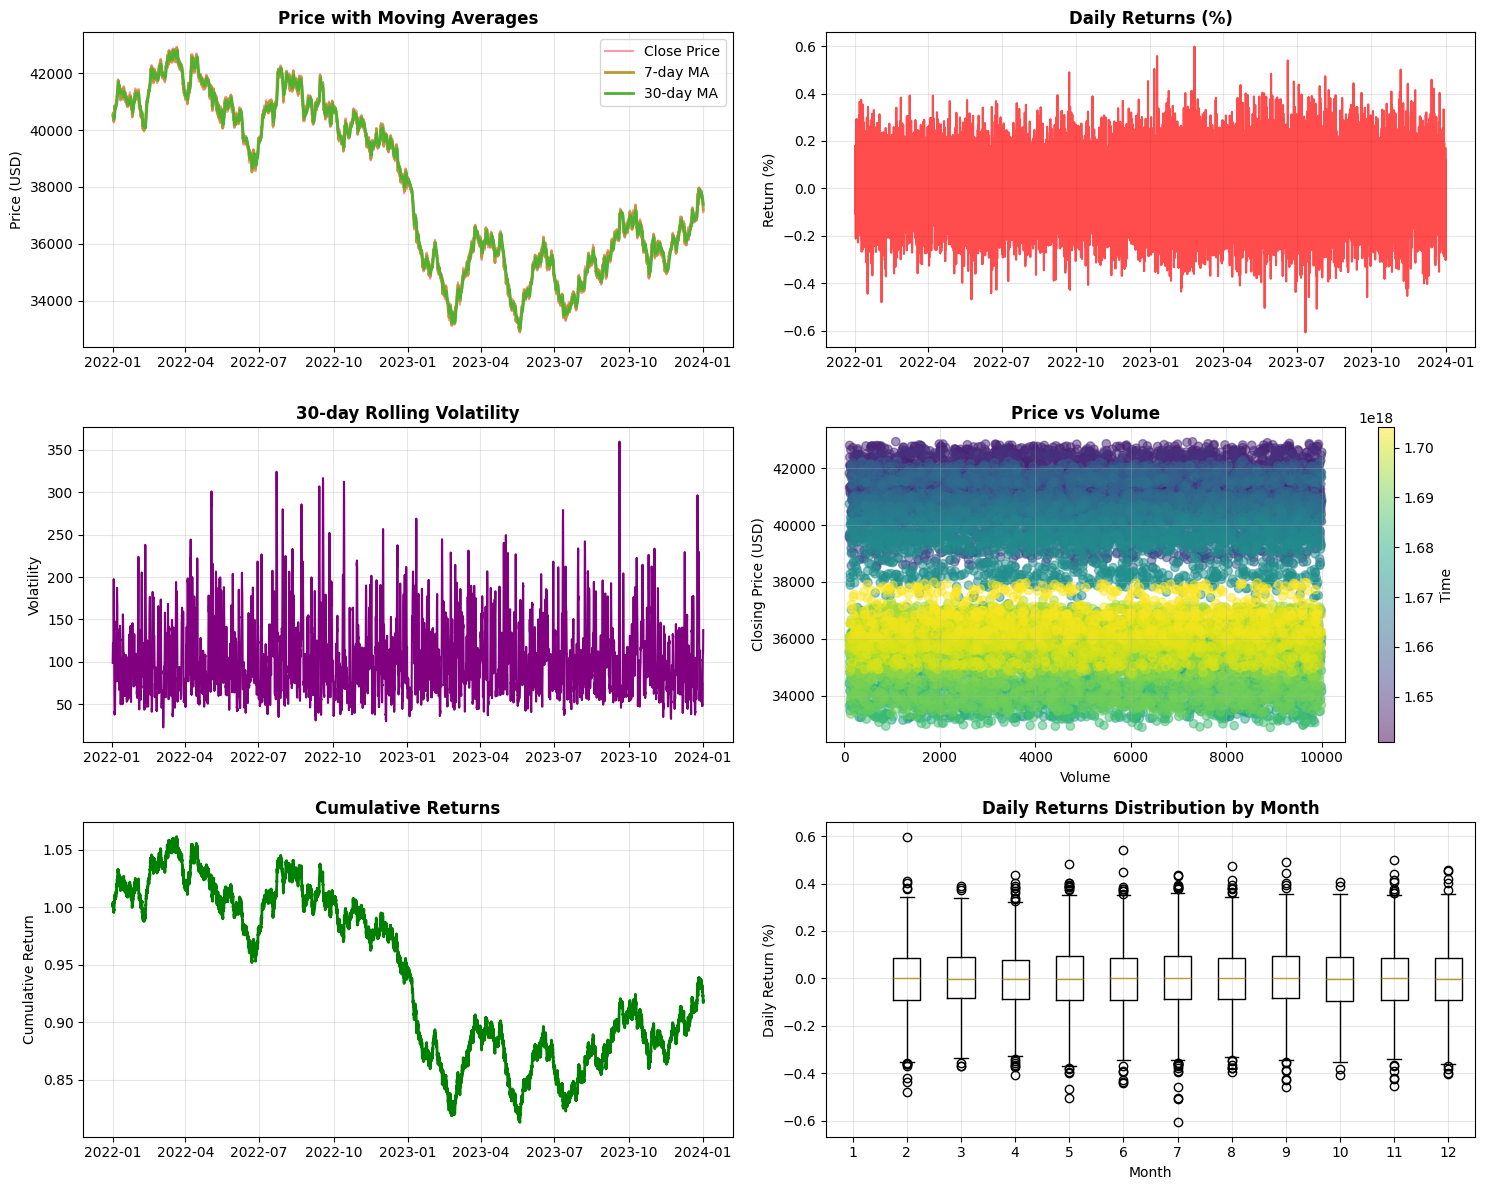

In [ ]:
# Advanced time series analysis
plt.figure(figsize=(15, 12))

# Plot 1: Moving averages
plt.subplot(3, 2, 1)
btc_data_clean['MA_7'] = btc_data_clean[close_col].rolling(window=7).mean()
btc_data_clean['MA_30'] = btc_data_clean[close_col].rolling(window=30).mean()
plt.plot(btc_data_clean.index, btc_data_clean[close_col], label='Close Price', alpha=0.7)
plt.plot(btc_data_clean.index, btc_data_clean['MA_7'], label='7-day MA', linewidth=2)
plt.plot(btc_data_clean.index, btc_data_clean['MA_30'], label='30-day MA', linewidth=2)
plt.title('Price with Moving Averages', fontweight='bold')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Daily returns
plt.subplot(3, 2, 2)
btc_data_clean['Daily_Return'] = btc_data_clean[close_col].pct_change() * 100
plt.plot(btc_data_clean.index, btc_data_clean['Daily_Return'], color='red', alpha=0.7)
plt.title('Daily Returns (%)', fontweight='bold')
plt.ylabel('Return (%)')
plt.grid(True, alpha=0.3)

# Plot 3: Volatility (rolling standard deviation)
plt.subplot(3, 2, 3)
btc_data_clean['Volatility'] = btc_data_clean[close_col].rolling(window=30).std()
plt.plot(btc_data_clean.index, btc_data_clean['Volatility'], color='purple')
plt.title('30-day Rolling Volatility', fontweight='bold')
plt.ylabel('Volatility')
plt.grid(True, alpha=0.3)

# Plot 4: Price vs Volume scatter
plt.subplot(3, 2, 4)
plt.scatter(btc_data_clean[volume_col], btc_data_clean[close_col], alpha=0.5, c=btc_data_clean.index, cmap='viridis')
plt.colorbar(label='Time')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.title('Price vs Volume', fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 5: Cumulative returns
plt.subplot(3, 2, 5)
btc_data_clean['Cumulative_Return'] = (1 + btc_data_clean['Daily_Return']/100).cumprod()
plt.plot(btc_data_clean.index, btc_data_clean['Cumulative_Return'], color='green', linewidth=2)
plt.title('Cumulative Returns', fontweight='bold')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)

# Plot 6: Box plot of daily returns by month
plt.subplot(3, 2, 6)
btc_data_clean['Month'] = btc_data_clean.index.month
btc_data_clean['Year'] = btc_data_clean.index.year
monthly_data = btc_data_clean.groupby('Month')['Daily_Return'].apply(list)
plt.boxplot(monthly_data.values, labels=monthly_data.index)
plt.title('Daily Returns Distribution by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Daily Return (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

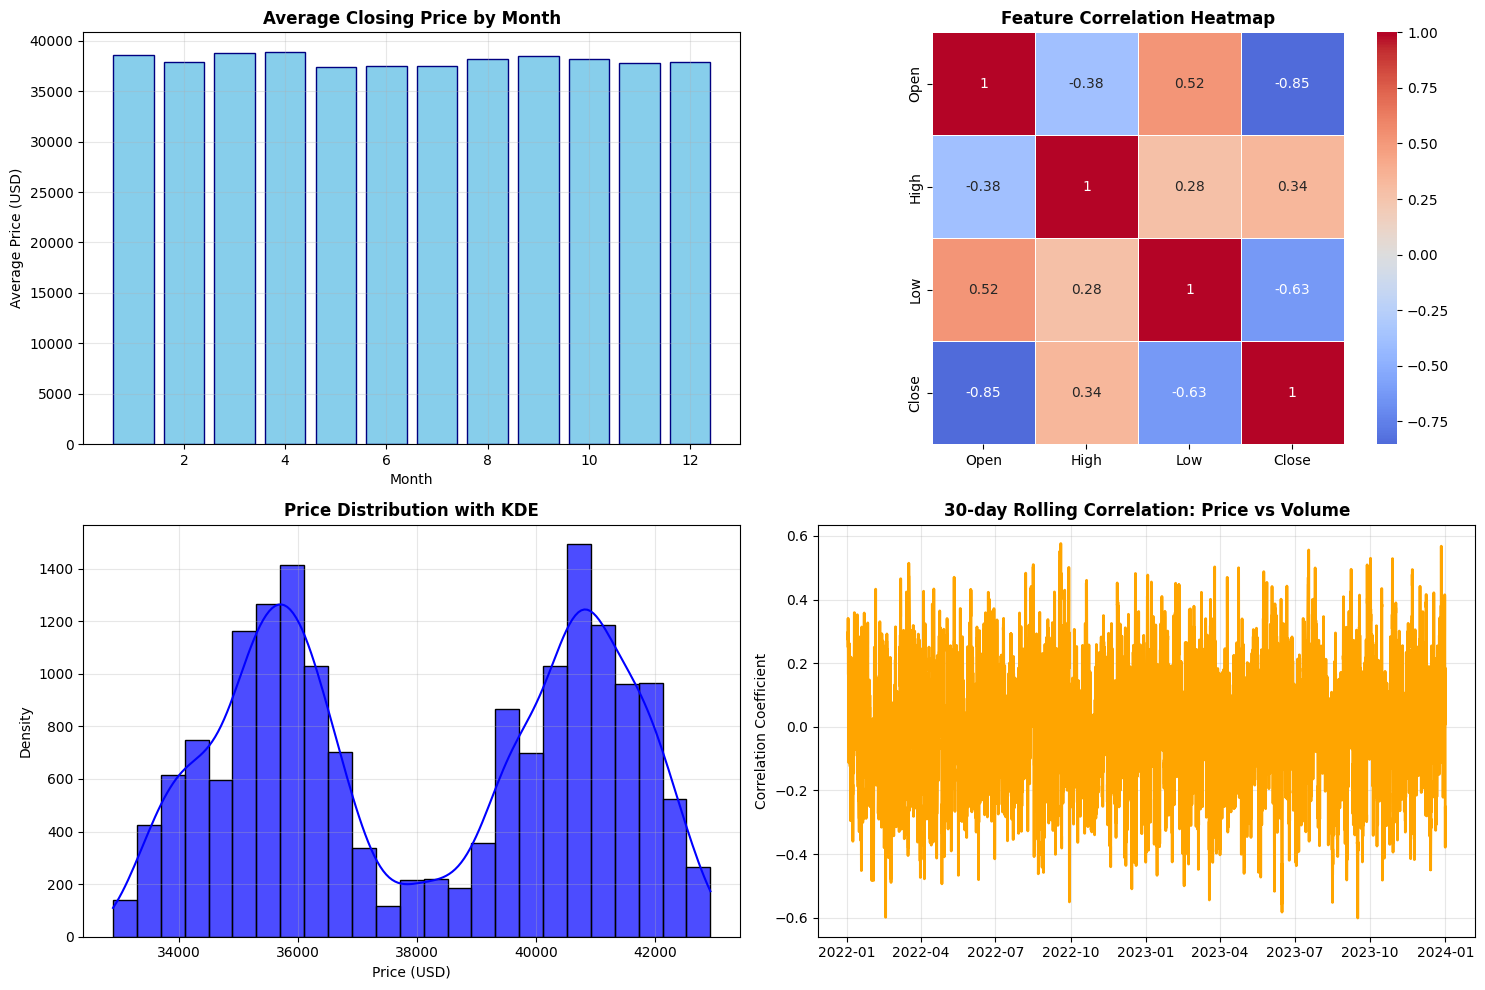

In [ ]:
# Seasonal analysis and correlations
plt.figure(figsize=(15, 10))

# Plot 1: Seasonal patterns (monthly averages)
plt.subplot(2, 2, 1)
monthly_avg = btc_data_clean.groupby('Month')[close_col].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue', edgecolor='navy')
plt.title('Average Closing Price by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.grid(True, alpha=0.3)

# Plot 2: Correlation heatmap
plt.subplot(2, 2, 2)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
available_cols = [col for col in numeric_cols if col in btc_data_clean.columns]
correlation_matrix = btc_data_clean[available_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontweight='bold')

# Plot 3: Price distribution with KDE
plt.subplot(2, 2, 3)
sns.histplot(btc_data_clean[close_col], kde=True, color='blue', alpha=0.7)
plt.title('Price Distribution with KDE', fontweight='bold')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

# Plot 4: Rolling correlation between price and volume
plt.subplot(2, 2, 4)
btc_data_clean['Rolling_Corr'] = btc_data_clean[close_col].rolling(window=30).corr(btc_data_clean[volume_col])
plt.plot(btc_data_clean.index, btc_data_clean['Rolling_Corr'], color='orange', linewidth=2)
plt.title('30-day Rolling Correlation: Price vs Volume', fontweight='bold')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ---------- 1. Function to safely detect columns ----------
def get_column(df, possible_names):
    """Safely get column name from dataframe"""
    for name in possible_names:
        if name in df.columns:
            return name
    for col in df.columns:
        for name in possible_names:
            if name.lower() in col.lower():
                return col
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        return numeric_cols[0]
    return df.columns[0]

# ---------- 2. Safely get column names ----------
close_col = get_column(btc_data, ['Close', 'close', 'closing_price', 'price'])
volume_col = get_column(btc_data, ['Volume', 'volume', 'Volume_(BTC)', 'Volume_(Currency)'])
high_col = get_column(btc_data, ['High', 'high', 'highest'])
low_col = get_column(btc_data, ['Low', 'low', 'lowest'])

print(f"Detected columns - Close: {close_col}, Volume: {volume_col}, High: {high_col}, Low: {low_col}")

# ---------- 3. Data validation ----------
if btc_data.empty:
    raise ValueError("Dataset is empty.")

# ---------- 4. Calculate daily returns ----------
if 'Daily_Return' not in btc_data.columns:
    if len(btc_data) < 2:
        print("Warning: Not enough data points to calculate returns")
        btc_data['Daily_Return'] = 0
    else:
        btc_data['Daily_Return'] = btc_data[close_col].pct_change() * 100
        btc_data['Daily_Return'] = btc_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)

# ---------- 5. Safe date range ----------
try:
    date_min = btc_data.index.min()
    date_max = btc_data.index.max()
    print(f"Date range: {date_min} to {date_max}")
except:
    print("Date range: Could not determine")

# ---------- 6. Safe numeric calculations ----------
try:
    print(f"Maximum price: ${btc_data[close_col].max():.2f}")
    print(f"Minimum price: ${btc_data[close_col].min():.2f}")
    print(f"Average price: ${btc_data[close_col].mean():.2f}")
    print(f"Standard deviation: ${btc_data[close_col].std():.2f}")
except Exception as e:
    print(f"Error calculating price statistics: {e}")

# ---------- 7. Return statistics ----------
try:
    valid_returns = btc_data['Daily_Return'].dropna()
    if not valid_returns.empty:
        print(f"Average daily return: {valid_returns.mean():.4f}%")
        print(f"Volatility (std of returns): {valid_returns.std():.4f}%")
    else:
        print("No valid return data")
except Exception as e:
    print(f"Error calculating return statistics: {e}")

# ---------- 8. Total return ----------
try:
    if len(btc_data) >= 2 and btc_data[close_col].iloc[0] != 0:
        total_return = (btc_data[close_col].iloc[-1] / btc_data[close_col].iloc[0] - 1) * 100
        print(f"\nTotal return over period: {total_return:.2f}%")
    else:
        total_return = 0
        print("\nTotal return over period: Cannot calculate (insufficient data or division by zero)")
except Exception as e:
    total_return = 0
    print(f"Error calculating total return: {e}")

# ---------- 9. Sharpe ratio ----------
try:
    if len(valid_returns) > 1 and valid_returns.std() > 0:
        sharpe_ratio = valid_returns.mean() / valid_returns.std() * np.sqrt(365)
        print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
    else:
        sharpe_ratio = 0
        print("Annualized Sharpe Ratio: Cannot calculate (insufficient data or zero volatility)")
except Exception as e:
    sharpe_ratio = 0
    print(f"Error calculating Sharpe ratio: {e}")

# ---------- 10. Best/Worst daily returns ----------
try:
    if not valid_returns.empty:
        print(f"Best daily return: {valid_returns.max():.2f}%")
        print(f"Worst daily return: {valid_returns.min():.2f}%")
    else:
        print("No valid return data for best/worst day")
except Exception as e:
    print(f"Error calculating best/worst returns: {e}")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

Detected columns - Close: Close, Volume: Volume_(BTC), High: High, Low: Low
Date range: 0 to 17520
Maximum price: $42935.65
Minimum price: $32885.00
Average price: $38097.89
Standard deviation: $2858.59
Average daily return: -0.0004%
Volatility (std of returns): 0.1337%

Total return over period: -8.13%
Annualized Sharpe Ratio: -0.0564
Best daily return: 0.60%
Worst daily return: -0.61%

ANALYSIS COMPLETE
